In [1]:
import numpy as np
import random
import struct
import math
import matplotlib.pylab as pylab

In [2]:
def plot_epoch_vs_MSE_training_set(epoch_array, last_epoch, mse_array):
    pylab.title("Epoch VS Energy function for Training Set")
    pylab.plot(epoch_array, mse_array, 'o-')
    pylab.xlim(0, last_epoch + 1)
    pylab.show()


def plot_epoch_vs_error_graph(epoch_array, last_epoch, error_array):
    pylab.title("Epoch VS Classification error")
    pylab.plot(epoch_array, error_array, 'o-')
    pylab.xlim(0, last_epoch + 1)
    pylab.show()


def plot_epoch_vs_energy_function_for_test_set(X, Y):
    pylab.title("Epoch VS Energy function for Test Set")
    pylab.plot(X, Y, 'ro')
    pylab.show()

In [3]:
def generate_weight_matrix(n, m, r_start, r_end):
    weights = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            weights[i][j] = random.uniform(r_start, r_end)
    return weights

In [4]:
def train_network(H_L_N_Num, O_L_N_Num, eta, hidden_l_neuron_weights, output_l_neuron_weights):

    epoch = 0
    data_set_size = 60000
    print("Training data size:",data_set_size)
    epochs_array = []
    error_array = []
    mse_array = []
    x = np.zeros((1, 784))
    while (True):
        error = 0
        mse = 0
        misclassification_error = 0
        # start of training data set iteration and processing

        train_img = open('train-images.idx3-ubyte', 'rb')
        for i in range(4):
            train_img.read(4)
        train_lbl = open('train-labels.idx1-ubyte', 'rb')
        for i in range(2):
            train_lbl.read(4)

        for i in range(data_set_size):
            # print("iteration count:", i)
            for p in range(784):
                x[0][p] = struct.unpack('>B', train_img.read(1))[0]
                x[0][p] = x[0][p] / 256
            d = struct.unpack('>B', train_lbl.read(1))[0]
            D = np.zeros((10, 1))
            D[d][0] = 1
            x = np.transpose(x)
            Z = np.zeros((50, 1))

            V = np.dot(hidden_l_neuron_weights, x)
            for i in range(H_L_N_Num):
                Z[i][0] = np.tanh(V[i][0])
            Y = np.zeros((10, 1))
            DELTA_2 = np.zeros((10, 1))
            DELTA_1 = np.zeros((50, 1))
            V_out = np.zeros((10, 1))
            V_out = np.dot(output_l_neuron_weights, Z)
            for i in range(O_L_N_Num):
                Y[i][0] = np.tanh(V_out[i][0])
            y = np.argmax(Y)
            D_minus_Y = np.subtract(D, Y)
            for i in range(O_L_N_Num):
                transfer_derivative = (1 - math.pow((math.tanh(V_out[i][0])), 2))
                DELTA_2[i][0] = -2 * transfer_derivative * D_minus_Y[i][0]

            DELTA2_mul_W_out = np.dot(np.transpose(output_l_neuron_weights), DELTA_2)
            for i in range(H_L_N_Num):
                transfer_derivative = (1 - math.pow((math.tanh(V[i][0])), 2))
                DELTA_1[i][0] = transfer_derivative * DELTA2_mul_W_out[i][0]
            x = np.transpose(x)
            output_l_neuron_weights = output_l_neuron_weights - (eta * np.dot(DELTA_2, np.transpose(Z)))
            hidden_l_neuron_weights = hidden_l_neuron_weights - (eta * np.dot(DELTA_1, x))
            if d != y:
                error = error + 1
                mse = mse + math.pow((d - y), 2)
        # end of for loop
        epoch = epoch + 1
        epochs_array.append(epoch)
        print("epoch:", epoch)
        if error > misclassification_error:
            eta = eta * 0.9
        misclassification_error = error
        print("Total classification error:", misclassification_error)
        error_array.append(misclassification_error)
        MSE = mse / data_set_size
        mse_array.append(MSE)
        print("MSE: ", MSE, " Error rate:", (error / data_set_size))
        success_rate = 100 - ((error / data_set_size)*100)
        print("Success rate:",success_rate)
        if (error / data_set_size) < 0.055:
            break  # break the while loop

    plot_epoch_vs_error_graph(epochs_array, epoch, error_array)
    plot_epoch_vs_MSE_training_set(epochs_array, epoch, mse_array)
    return hidden_l_neuron_weights, output_l_neuron_weights

In [9]:
def test_network(H_L_N_Num, O_L_N_Num, eta, hidden_l_neuron_weights, output_l_neuron_weights):

    epoch = 0
    data_set_size = 10000
    print("Test data size:",10000)
    epochs_array = []
    error_array = []
    mse_array = []
    x = np.zeros((1, 784))
    error = 0
    mse = 0
    print("Testing on the test data")

    test_img = open('t10k-images.idx3-ubyte', 'rb')
    for i in range(4):
        test_img.read(4)
    test_lbl = open('t10k-labels.idx1-ubyte', 'rb')
    for i in range(2):
        test_lbl.read(4)

    for i in range(data_set_size):
        for p in range(784):
            x[0][p] = struct.unpack('>B', test_img.read(1))[0]
            x[0][p] = x[0][p] / 256
        d = struct.unpack('>B', test_lbl.read(1))[0]
        D = np.zeros((10, 1))
        D[d][0] = 1
        x = np.transpose(x)
        Z = np.zeros((50, 1))
        V = np.dot(hidden_l_neuron_weights, x)
        for i in range(H_L_N_Num):
            Z[i][0] = np.tanh(V[i][0])
        Y = np.zeros((10, 1))
        V_out = np.dot(output_l_neuron_weights, Z)
        for i in range(O_L_N_Num):
            Y[i][0] = np.tanh(V_out[i][0])
        y = np.argmax(Y)
        x = np.transpose(x)
        if d != y:
            error = error + 1
            mse = mse + math.pow((d - y), 2)
    # end of for loop
    epoch = epoch + 1
    epochs_array.append(epoch)
    print("epoch:", epoch)
    misclassification_error = error
    print("Total test data classification error:", misclassification_error)
    error_array.append(misclassification_error)
    MSE = mse / data_set_size
    mse_array.append(MSE)
    print("Test data set MSE: ", MSE)
    print("Test data success rate:", (100 - (error / data_set_size)*100))
    #plot_epoch_vs_error_graph(epochs_array, epoch, error_array)
    #plot_epoch_vs_MSE_training_set(epochs_array, epoch, mse_array)

In [6]:
H_L_N_Num = 50
O_L_N_Num = 10
eta = 0.01
print("eta:",eta)
print("H_L_N_Num:", H_L_N_Num)
print("O_L_N_Num:", O_L_N_Num)

hidden_l_neuron_weights = generate_weight_matrix(H_L_N_Num, 784, -0.1, 0.1)
output_l_neuron_weights = generate_weight_matrix(O_L_N_Num, H_L_N_Num, -0.1, 0.1)

eta: 0.01
H_L_N_Num: 50
O_L_N_Num: 10


Training data size: 60000
epoch: 1
Total classification error: 6309
MSE:  1.8425666666666667  Error rate: 0.10515
Success rate: 89.485
epoch: 2
Total classification error: 4827
MSE:  1.417  Error rate: 0.08045
Success rate: 91.955
epoch: 3
Total classification error: 4437
MSE:  1.3000666666666667  Error rate: 0.07395
Success rate: 92.605
epoch: 4
Total classification error: 4219
MSE:  1.2466333333333333  Error rate: 0.07031666666666667
Success rate: 92.96833333333333
epoch: 5
Total classification error: 4057
MSE:  1.2083333333333333  Error rate: 0.06761666666666667
Success rate: 93.23833333333333
epoch: 6
Total classification error: 3900
MSE:  1.1685833333333333  Error rate: 0.065
Success rate: 93.5
epoch: 7
Total classification error: 3796
MSE:  1.1321  Error rate: 0.06326666666666667
Success rate: 93.67333333333333
epoch: 8
Total classification error: 3706
MSE:  1.1027333333333333  Error rate: 0.061766666666666664
Success rate: 93.82333333333334
epoch: 9
Total classification error: 3

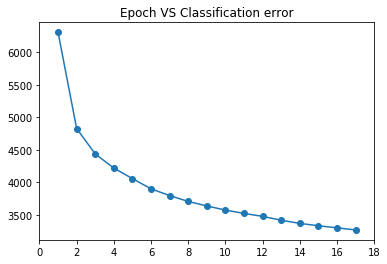

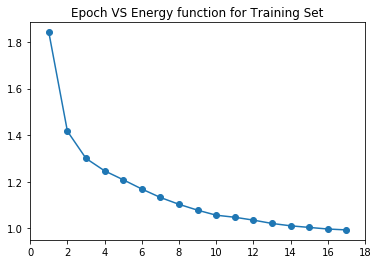

In [7]:
updated_hidden_l_neuron_weights, updated_output_l_neuron_weights = train_network(H_L_N_Num, O_L_N_Num, eta, hidden_l_neuron_weights, output_l_neuron_weights)

In [10]:
test_network(H_L_N_Num, O_L_N_Num, eta, updated_hidden_l_neuron_weights, updated_output_l_neuron_weights)

Test data size: 10000
Testing on the test data
epoch: 1
Total test data classification error: 619
Test data set MSE:  1.1304
Test data success rate: 93.81
